# Домашнее задание по предмету "Методы численного решения стационарных задач науки и техники"

## Алгоритм для получения результатов

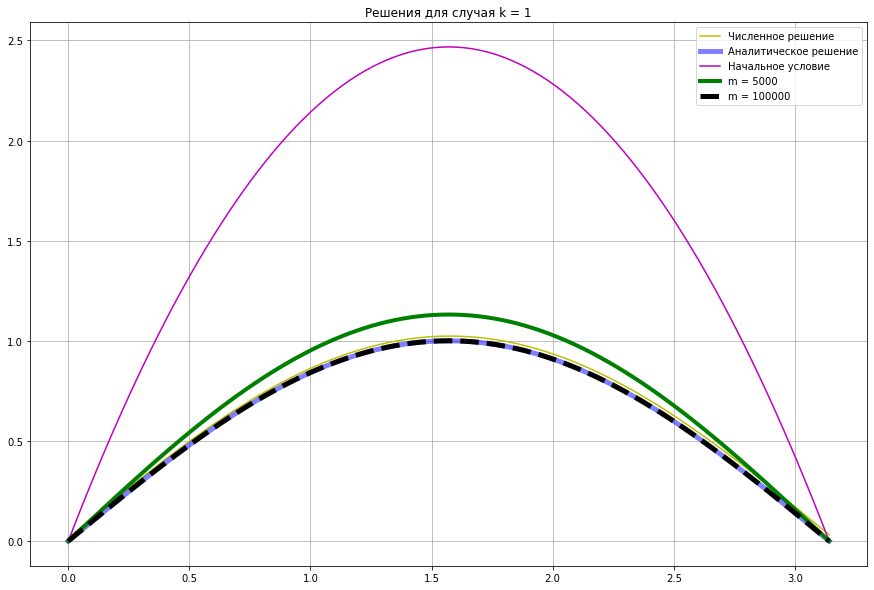

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

def f(x, k):
    return - k**2 * np.sin(k * x)

def psi(x):
    return x * (np.pi - x)

k = 1
x0, xn = 0, np.pi
N = 101
h = (xn - x0) / (N - 1)

x = [x0 + i * h for i in np.arange(0, N, 1)]
A = np.zeros((N, N))
b = np.zeros(N)

m1 = 5e+3
m2 = 100e+3

l_min = 4 * np.cos(np.pi / 2 / N)**2 / h**2
l_max = 4 * np.sin(np.pi / 2 / N)**2 / h**2
tau = 2 / (l_min + l_max)

A[0, 0] = -2 / h**2
A[0, -1] = 1 / h**2
b[0] = f(x[0], k)
for idx in np.arange(1, N-1):
    A[idx, idx - 1] = 1 / h**2
    A[idx, idx] = -2 / h**2
    A[idx, idx + 1] = 1 / h**2
    b[idx] = f(x[idx], k)
A[-1, -1] = -2 / h**2
A[-1, -2] = 1 / h**2
b[-1] = f(x[-1], k)

u_num = np.linalg.solve(A, b)

u = np.array([psi(i) for i in x])
u_start = np.copy(u)

it = 0
while True:
    u_prev = np.copy(u)
    for j in np.arange(1, N-1, 1):
        u[j] = u_prev[j] + (u_prev[j - 1] - 2 * u_prev[j] + u_prev[j + 1]) * tau / h**2 - tau * f(x[j], k)
    it += 1
    if it == m1:
        u_m1 = np.copy(u)
    if it == m2:
        u_m2 = np.copy(u)
        break
    
clr = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
random.shuffle(clr)

fig, ax = plt.subplots()
ax.plot(x, u_num, label = "Численное решение", color = clr[0])
ax.plot(x, [np.sin(k * i) for i in x], label = "Аналитическое решение", color = clr[1], alpha = 0.5, linewidth = 5)
ax.plot(x, u_start, label = "Начальное условие", color = clr[2])
ax.plot(x, u_m1, label = f"m = {m1:.0f}", color = clr[3], linewidth = 4)
ax.plot(x, u_m2, label = f"m = {m2:.0f}", color = clr[4], linestyle = "--", linewidth = 5)

ax.legend()
ax.grid()
ax.set(title = f"Решения для случая k = {k}")

fig.set_figheight(10)
fig.set_figwidth(15)

plt.show()